<a href="https://colab.research.google.com/github/IrinaChen/Banking-Analytics-2020---Deep-Learning/blob/main/Coursework03Q1%20-Logistic%20Regression%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Q1.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/My Drive/DefaultRiskperArea.csv")

In [ ]:
# Import all the packages we need
from string import ascii_letters
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# check data
data.head()

,fico,mi_pct,cnt_units,cltv,ltv,cnt_borr,occpy_sts_S,channel_C,channel_T,prop_type_MH,prop_type_PU,loan_purpose_N,Area_Number,BinaryDefault
0,1.815482,-2.997902,0.277646,-4.035187,-3.964115,-2.273682,0.148702,-1.594817,-0.035245,-0.501916,-0.949227,-0.493965,634.0,0
1,-0.521829,-2.227060,3.498789,-1.810005,-1.772268,-0.171886,-0.751896,-0.865516,-0.035245,-0.501916,-0.199528,-0.816696,417.0,0
2,-0.457652,-2.095699,10.741067,-1.211170,-1.174970,-1.394290,-0.712228,0.155562,-0.035245,-0.501916,-0.934777,-0.587245,678.0,0
3,0.636380,-0.929451,0.754667,-0.616046,-0.606611,0.626942,-0.663063,-0.827111,-0.035245,-0.501916,-0.676832,-0.666799,490.0,1
4,0.324697,-0.815769,0.896132,-0.609527,-0.580298,0.523027,-0.809006,-0.996611,-0.035245,-0.501916,-0.897400,-0.793784,717.0,0


In [ ]:
data.dtypes

fico              float64
mi_pct            float64
cnt_units         float64
cltv              float64
ltv               float64
cnt_borr          float64
occpy_sts_S       float64
channel_C         float64
channel_T         float64
prop_type_MH      float64
prop_type_PU      float64
loan_purpose_N    float64
Area_Number       float64
BinaryDefault       int64
dtype: object

### Perfom data-cleansing:
1. check Null values
2. check Outliers
3. check correlation 


No Null Values

In [ ]:
null_columns = data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

Series([], dtype: float64)

Check outliers:
No Outliers 

In [ ]:
data.describe()

,fico,mi_pct,cnt_units,cltv,ltv,cnt_borr,occpy_sts_S,channel_C,channel_T,prop_type_MH,prop_type_PU,loan_purpose_N,Area_Number,BinaryDefault
count,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.00000
mean,0.007120,0.016389,-0.017660,0.013493,0.013376,0.013832,0.004054,0.007604,0.000578,0.006095,0.008061,0.002814,400.582598,0.36570
std,0.984451,0.989389,0.956987,0.993834,0.994099,0.995523,1.006318,1.003580,1.008789,1.007165,1.003446,0.994436,231.753621,0.48193
min,-11.799082,-3.219581,-0.504865,-8.173520,-8.016964,-6.498171,-0.809006,-2.349477,-0.035245,-0.501916,-0.949227,-2.585387,0.000000,0.00000
25%,-0.457652,-0.492901,-0.432656,-0.213919,-0.205172,-0.585534,-0.583392,-0.717448,-0.035245,-0.501916,-0.817361,-0.698534,201.000000,0.00000
50%,0.120364,0.113351,-0.287316,0.211616,0.212033,-0.009781,-0.376927,0.018039,-0.035245,-0.364331,-0.358295,-0.161625,400.000000,0.00000
75%,0.581679,0.678230,0.003386,0.580902,0.586892,0.646004,0.143035,0.640190,-0.035245,0.117718,0.614008,0.486337,600.000000,1.00000
max,2.824215,4.256191,10.741067,2.212681,2.203769,6.541198,5.973082,4.002008,28.372522,10.899360,4.007486,4.867681,805.000000,1.00000


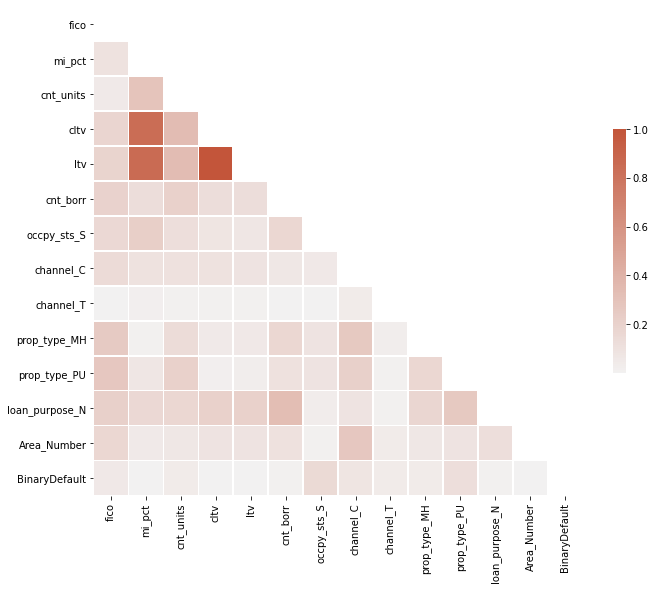

In [ ]:
# Compute the correlation matrix
corr = data.corr()
corr = np.abs(corr)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Since we have highly correlation between variables ltv and cltv, and 
correlation between mi_pct and cltv/ltv, therefore, we drop
ltv and mi_pct

In [ ]:
data = data.drop(columns = ["ltv","mi_pct"])

In [ ]:
#data = data.drop(columns = ["Area_Number"])

# Train and Test by pictures 

In [ ]:

idx = pd.read_excel("/content/drive/My Drive/Index.xlsx")

In [ ]:
idx_list = idx["Index"].tolist()

In [ ]:
range(len(idx_list))

range(0, 238)

In [ ]:
data["Indicator"] = None

In [ ]:
# Create an indicator column
for i in range(len(data)):
  if data["Area_Number"][i] in idx_list:
    data["Indicator"][i] = "Y" # Test sample
  else:
    data["Indicator"][i] = "N"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print('Size of the indicator: ', data["Indicator"].shape)

Size of the indicator:  (793,)


In [ ]:
test_data = data.iloc[np.where(data["Indicator"]=="Y")[0],:]
train_data = data.iloc[np.where(data["Indicator"]=="N")[0],:]

In [ ]:
print('Size of the training set: ', train_data.shape)
print('Size of the test set: ', test_data.shape)

Size of the training set:  (555, 13)
Size of the test set:  (238, 13)


In [ ]:
# Drop Area Number 
train_data = train_data.drop(columns = ["Area_Number"])
test_data = test_data.drop(columns = ["Area_Number"])

In [ ]:
# Drop Indicator
train_data = train_data.drop(columns = ["Indicator"])
test_data = test_data.drop(columns = ["Indicator"])

## Normalized the data

The data is normalized already! 


In [ ]:
!pip install scorecardpy

     |████████████████████████████████| 61kB 3.1MB/s 
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.2-cp36-none-any.whl size=57827 sha256=9421d8bef6a1f36ae5e3213df8854aeac75fa85c41c28497dda8b9ce9cbb3b25
  Stored in directory: /root/.cache/pip/wheels/1d/66/14/23aeb4e1128278f5880580e2fdd10e956de112a5d56a3a043e
Successfully built scorecardpy


In [ ]:
import scorecardpy as sc

The trainning set has been normalized!

In [ ]:
train_data.describe()

,fico,cnt_units,cltv,cnt_borr,occpy_sts_S,channel_C,channel_T,prop_type_MH,prop_type_PU,loan_purpose_N,BinaryDefault
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,0.041099,0.019765,-0.010982,0.015721,-0.032248,0.001973,0.015940,-0.008626,-0.001787,-0.020519,0.365766
std,0.847324,1.052906,1.050163,0.960170,0.967640,0.974611,1.205843,0.962021,0.979634,0.959883,0.482079
min,-5.894282,-0.504865,-8.173520,-3.608365,-0.809006,-2.349477,-0.035245,-0.501916,-0.949227,-2.585387,0.000000
25%,-0.434421,-0.423447,-0.218351,-0.589543,-0.590229,-0.686945,-0.035245,-0.501916,-0.808419,-0.707184,0.000000
50%,0.118575,-0.272483,0.204213,-0.006408,-0.388444,-0.017900,-0.035245,-0.368412,-0.358295,-0.177082,0.000000
75%,0.566657,0.031469,0.586962,0.634893,0.104072,0.610742,-0.035245,0.116043,0.620824,0.448286,1.000000
max,2.824215,10.741067,2.212681,6.541198,5.410994,4.002008,28.372522,10.186780,4.007486,4.053841,1.000000


In [ ]:
train_data.head()

,fico,cnt_units,cltv,cnt_borr,occpy_sts_S,channel_C,channel_T,prop_type_MH,prop_type_PU,loan_purpose_N,BinaryDefault
1,-0.521829,3.498789,-1.810005,-0.171886,-0.751896,-0.865516,-0.035245,-0.501916,-0.199528,-0.816696,0
2,-0.457652,10.741067,-1.211170,-1.394290,-0.712228,0.155562,-0.035245,-0.501916,-0.934777,-0.587245,0
3,0.636380,0.754667,-0.616046,0.626942,-0.663063,-0.827111,-0.035245,-0.501916,-0.676832,-0.666799,1
4,0.324697,0.896132,-0.609527,0.523027,-0.809006,-0.996611,-0.035245,-0.501916,-0.897400,-0.793784,0
5,0.286753,1.673203,-0.984939,0.523027,-0.809006,-0.855187,-0.035245,-0.501916,-0.949227,-0.490590,1


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression

In [ ]:
data_logreg = LogisticRegression(penalty='l1', # Type of penalization l1 = lasso, l2 = ridge
                             tol=0.00001, # Tolerance for parameters
                             C = 0.1,#obtained from CV
                             fit_intercept=True, # Use constant?
                             class_weight='balanced', # Weights, see below
                             random_state=250747350, # Random seed
                            max_iter=500, # Maximum iterations
                           verbose=1, # Show process. 1 is yes.
                           solver = 'saga', # How to optimize.
                           n_jobs = 2      # Processes to use. Set to number of physical cores. 
                                   )

In [ ]:
data_logregCV = LogisticRegressionCV(penalty='l1', # Type of penalization l1 = lasso, l2 = ridge
                            Cs = [1e-3,1e-2, 1e-1,1,
                                10,100,1000],    
                            tol=0.0001, # Tolerance for parameters
                            cv = 3,     # How many CV folds to try. 3 or 5 should be enough.
                            fit_intercept=True, # Use constant
                            class_weight= "balanced", # Weights
                            random_state= 250747350, # ID
                            max_iter= 1000, # Maximum iterations
                            verbose=1, # Show process. 1 is yes.
                            solver = 'saga', # How to optimize.
                            n_jobs = 2,      # Processes to use. Set to number of physical cores. 
                            refit = True  )

In [ ]:
train_CV = data_logregCV.fit(X = train_data.iloc[:, : -1], # All rows and from the second var to end
                    y = train_data['BinaryDefault'] # The target
                   )

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 1 epochs took 0 secondsconvergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds

convergence after 1 epochs took 0 seconds
convergence after 46 epochs took 0 seconds
convergence after 46 epochs took 0 seconds
convergence after 93 epochs took 0 seconds
convergence after 60 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 39 epochs took 0 seconds
convergence after 124 epochs took 0 seconds
convergence after 127 epochs took 0 seconds
convergence after 242 epochs took 0 seconds
convergence after 255 epochs took 0 seconds
convergence after 497 epochs took 0 seconds
convergence after 456 epochs took 0 seconds
convergence after 211 epochs took 0 seconds
convergence after 246 epochs took 0 seconds


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.4s finished


In [ ]:
data_logregCV.intercept_ # close to 0

array([-0.00740037])

In [ ]:
data_logregCV.C_

array([1.])

In [ ]:
coef_df = pd.concat([pd.DataFrame({'column': train_data.columns[:-1]}), 
                    pd.DataFrame(np.transpose(train_CV.coef_))],
                    axis = 1
                   )

coef_df

,column,0
0,fico,-0.121986
1,cnt_units,0.158727
2,cltv,0.120695
3,cnt_borr,0.060100
4,occpy_sts_S,0.435322
5,channel_C,-0.190112
6,channel_T,0.116792
7,prop_type_MH,0.028479
8,prop_type_PU,-0.144096
9,loan_purpose_N,0.067586


In [ ]:
fit_train = data_logreg.fit(X = train_data.iloc[:, : -1], # All rows and from the second var to end
                    y = train_data['BinaryDefault'] # The target
                   )

convergence after 50 epochs took 0 seconds


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished


In [ ]:
sc.iv(train_data, 'BinaryDefault')

,variable,info_value
6,prop_type_MH,0.097046
1,prop_type_PU,0.067367
9,occpy_sts_S,0.048128
2,cnt_units,0.047488
8,cnt_borr,0.032311
0,channel_C,0.026622
7,loan_purpose_N,0.018676
3,fico,0.010293
4,cltv,0.010246
5,channel_T,0.001570


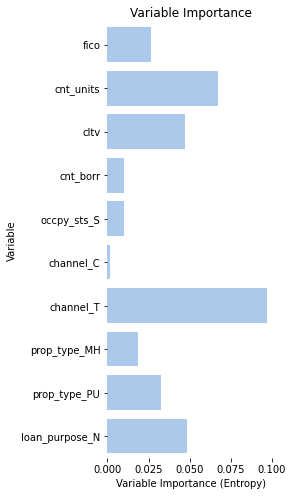

In [ ]:
# Plot variable importance
importances = sc.iv(train_data, 'BinaryDefault')['info_value']
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance")
sns.set_color_codes("pastel")
sns.barplot(y=[train_data.iloc[:, :-1].columns[i] for i in indices], x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Entropy)")
sns.despine(left=True, bottom=True)

In [ ]:
pred_class_test = fit_train.predict(test_data.iloc[:,:-1])
probs_test = fit_train.predict_proba(test_data.iloc[:,:-1])
print(probs_test[0:5], pred_class_test[0:5])

[[0.42150333 0.57849667]
 [0.19281158 0.80718842]
 [0.43526635 0.56473365]
 [0.54206188 0.45793812]
 [0.39823523 0.60176477]] [1 1 1 0 1]


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_true = test_data['BinaryDefault'], y_pred = pred_class_test)

array([[82, 69],
       [44, 43]])

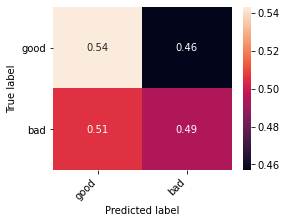

In [ ]:
# Calculate confusion matrix
confusion_matrix_logreg = confusion_matrix(y_true = test_data['BinaryDefault'], 
                    y_pred = pred_class_test)

# Turn matrix to percentages
confusion_matrix_logreg = confusion_matrix_logreg.astype('float') / confusion_matrix_logreg.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_logreg, index=['good', 'bad'], columns=['good', 'bad'], 
)

# Parameters of the image
figsize = (4,3)
fontsize=10

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()

AUC

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(test_data['BinaryDefault'], probs_test[:,1])

0.59907132526452

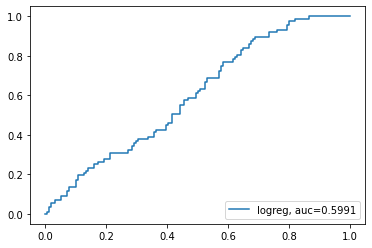

In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(test_data['BinaryDefault'], probs_test[:,1])

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = test_data['BinaryDefault'], 
                             y_score = probs_test[:,1]),
              decimals = 4)

# Create and show the plot
plt.plot(fpr,tpr,label="logreg, auc="+str(auc))
plt.legend(loc=4)
plt.show()